In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import gc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

In [2]:
cop_u = pd.read_csv('전처리_cop_u.csv') # 제휴사 이용 정보

In [3]:
demo = pd.read_csv('demo_최종.csv') # 고객 정보
pdde = pd.read_csv('전처리_pdde.csv') # 유통사 상품 구매 내역
cop_u = pd.read_csv('전처리_cop_u.csv') # 제휴사 이용 정보
pd_clac = pd.read_csv('LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv') # 상품 분류 정보
br = pd.read_csv('LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv') # 점포 정보
lpay = pd.read_csv('LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv') # 엘페이 이용

## 수도권 여부 

- 수도권이면 1, 지방이면 0

- 대도시 종류

- 대도시에 있는 행정구역의 갯수 및 총 소비금액의 합을 고려하여 수도권/비수도권을 나눔

- 지역별 인구밀도 참고
: https://index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1007

대도시별 행정구역의 수

- 서울 : 25
- 경기도 : 31
- 인천 : 10
- 대전 : 5
- 세종 : 1
- 강원도 : 18
- 부산 : 16
- 대구 : 8
- 광주 : 5
- 충청북도 : 11
- 충청남도 : 15
- 전라북도 : 14
- 전라남도 : 22
- 경상북도 : 23
- 경상남도 : 18
- 제주도 : 2
- 울산 : 5

demo 데이터에서 지역 대분류에 대한 지역 소분류 갯수(행정구역의 수로 생각) 

- Z01(18)
- Z02(1) 
- Z03(5)
- Z04(11) 
-- Z05(22) 
- Z06(15) 
- Z07(2) 
- Z08(18) 
- Z09(15) 
- Z10(46) 
-- Z11(24) 
-- Z12(24) 
- Z13(5) 
- Z14(8) 
- Z15(5) 
- Z16(16) 
- Z17(25) 

In [4]:
a = demo.merge(pdde,on='cust')

In [5]:
a.groupby('zon_hlv')[['buy_am']].sum().sort_values(by='buy_am',ascending=False)

,buy_am
zon_hlv,
Z17,2.531706e+10
Z10,2.104935e+10
Z16,1.019496e+10
Z04,5.172264e+09
Z11,5.167950e+09
Z06,2.889579e+09
Z13,2.415105e+09
Z14,2.006070e+09
Z03,1.652076e+09


In [5]:
demo['수도권여부']= demo['zon_hlv']

demo.loc[demo['수도권여부'] == 'Z10','수도권여부'] = 1
demo.loc[demo['수도권여부'] == 'Z17','수도권여부'] = 1
demo.loc[demo['수도권여부'] == 'Z04','수도권여부'] = 1

demo.loc[demo['수도권여부'] != 1,'수도권여부'] = 0

demo.수도권여부

0        0
1        0
2        1
3        1
4        1
        ..
29696    1
29697    0
29698    1
29699    0
29700    1
Name: 수도권여부, Length: 29701, dtype: object

# EDA

In [6]:
demo.persona.value_counts()

40대_no7_여성      3247
30대_no4_여성      1862
40대_no5_남성      1828
30대_no4_남성      1703
50대_no5_여성      1506
                ... 
60대이상_no6_남성       2
30대_no11_여성        2
30대_no10_여성        1
50대_no8_남성         1
50대_no6_여성         1
Name: persona, Length: 82, dtype: int64

In [7]:
# merging persona
pdde = pd.merge(pdde, demo[['cust','persona']], on = 'cust')

In [8]:
pdde.persona.value_counts()

40대_no7_여성      930456
50대_no5_여성      479807
40대_no5_남성      399205
30대_no4_여성      373082
30대_no4_남성      200574
                 ...  
60대이상_no6_남성        41
50대_no6_남성          32
50대_no8_남성           3
30대_no11_여성          2
30대_no10_여성          1
Name: persona, Length: 73, dtype: int64

In [9]:
import numpy as np

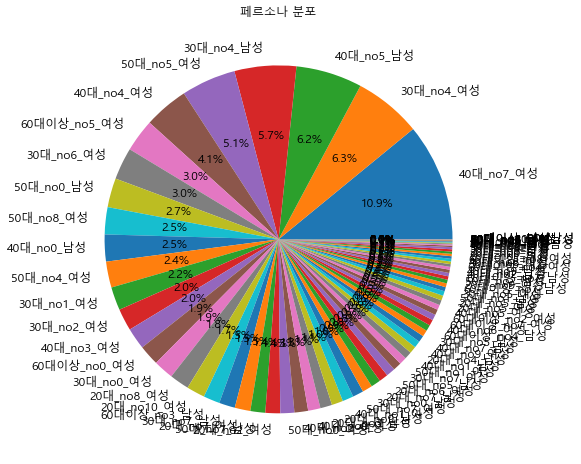

In [10]:
# 유저별 페르소나 분포
demo.persona.value_counts().sort_values(ascending = False).plot.pie(autopct = '%.1f%%', figsize = (12,8), fontsize = 12)
plt.ylabel('')
plt.title('페르소나 분포')
plt.show()

In [11]:
# 상위 10개 페르소나 리스트
top10_persona = demo.persona.value_counts().sort_values(ascending = False).head(10).index.tolist()

In [12]:
top10_persona

['40대_no7_여성',
 '30대_no4_여성',
 '40대_no5_남성',
 '30대_no4_남성',
 '50대_no5_여성',
 '40대_no4_여성',
 '60대이상_no5_여성',
 '30대_no6_여성',
 '50대_no0_남성',
 '50대_no8_여성']

In [13]:
# 페르소나별 소분류별 구매 횟수
per_pd = pd.pivot_table(pdde.reset_index(), index = 'persona', columns = 'pd_nm', values = 'index', aggfunc = 'count' , fill_value = 0)

In [14]:
a = per_pd.query('persona == @top10_persona').idxmax().reset_index()
a = a.rename(columns = {0 : 'persona'})

In [15]:
a.persona.value_counts()

40대_no7_여성      1389
30대_no4_여성       173
50대_no5_여성       114
40대_no5_남성        95
30대_no4_남성        88
40대_no4_여성        48
60대이상_no5_여성      12
50대_no8_여성         5
30대_no6_여성         5
50대_no0_남성         3
Name: persona, dtype: int64

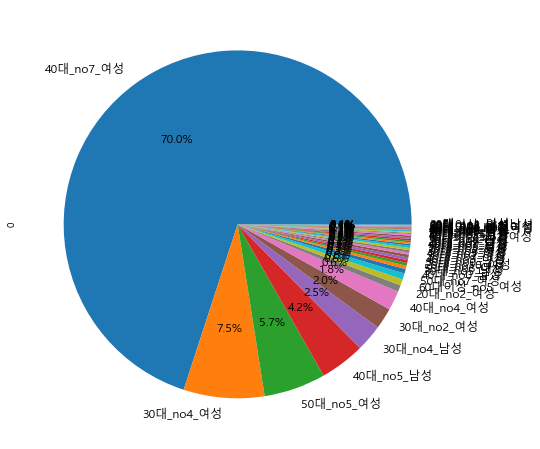

In [16]:
per_pd.idxmax().reset_index()[0].value_counts().sort_values(ascending = False).plot.pie(autopct = '%.1f%%', figsize = (12,8), fontsize = 12)
plt.show()

In [17]:
import gc
gc.collect()

9428

In [18]:
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from konlpy.tag import Kkma, Komoran, Okt, Mecab

In [19]:
tw = Twitter()
okt = Okt()

C:\Users\jinho\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [20]:
# persona top10
lst_여성_40대_no7 = []
lst_여성_30대_no4 = []
lst_남성_40대_no5 = []
lst_남성_30대_no4 = []
lst_여성_50대_no5 = []
lst_여성_40대_no4 = []
lst_여성_60대이상_no5  = []
lst_여성_30대_no6 = []
lst_남성_50대_no0 = []
lst_여성_50대_no8 = []

In [21]:
여성_40대_no7 = a.query('persona == "40대_no7_여성"').pd_nm.values.tolist()
여성_30대_no4 = a.query('persona == "30대_no4_여성"').pd_nm.values.tolist()
남성_40대_no5 = a.query('persona == "40대_no5_남성"').pd_nm.values.tolist()
남성_30대_no4 = a.query('persona == "30대_no4_남성"').pd_nm.values.tolist()
여성_50대_no5 = a.query('persona == "50대_no5_여성"').pd_nm.values.tolist()
여성_40대_no4 = a.query('persona == "40대_no4_여성"').pd_nm.values.tolist()
여성_60대이상_no5 = a.query('persona == "60대이상_no5_여성"').pd_nm.values.tolist()
여성_30대_no6 = a.query('persona == "30대_no6_여성"').pd_nm.values.tolist()
남성_50대_no0 = a.query('persona == "50대_no0_남성"').pd_nm.values.tolist()
여성_50대_no8 = a.query('persona == "50대_no8_여성"').pd_nm.values.tolist()

In [22]:
for i in 여성_40대_no7:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_40대_no7.append(tokens_text[0])

In [23]:
for i in 여성_30대_no4:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_30대_no4.append(tokens_text[0])

In [24]:
for i in 남성_40대_no5:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_남성_40대_no5.append(tokens_text[0])

In [25]:
for i in 남성_30대_no4:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_남성_30대_no4.append(tokens_text[0])

In [26]:
for i in 여성_50대_no5:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_50대_no5.append(tokens_text[0])

In [27]:
for i in 여성_40대_no4:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_40대_no4.append(tokens_text[0])

In [28]:
for i in 여성_60대이상_no5:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_60대이상_no5.append(tokens_text[0])

In [29]:
for i in 여성_30대_no6:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_30대_no6.append(tokens_text[0])

In [30]:
for i in 남성_50대_no0:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_남성_50대_no0.append(tokens_text[0])

In [31]:
for i in 여성_50대_no8:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_50대_no8.append(tokens_text[0])

In [32]:
# 딕셔너리 count화
def get_counts(seq): 
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [33]:
dict_여성_40대_no7 = get_counts(lst_여성_40대_no7)
dict_여성_30대_no4 = get_counts(lst_여성_30대_no4)
dict_남성_40대_no5 = get_counts(lst_남성_40대_no5)
dict_남성_30대_no4 = get_counts(lst_남성_30대_no4)
dict_여성_50대_no5 = get_counts(lst_여성_50대_no5)
dict_여성_40대_no4 = get_counts(lst_여성_40대_no4)
dict_여성_60대이상_no5 = get_counts(여성_60대이상_no5)
dict_여성_30대_no6 = get_counts(lst_여성_30대_no6)
dict_남성_50대_no0 = get_counts(lst_남성_50대_no0)
dict_여성_50대_no8 = get_counts(lst_여성_50대_no8)

In [34]:
dict_여성_40대_no7 = sorted(dict_여성_40대_no7.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_30대_no4 = sorted(dict_여성_30대_no4.items(), key = lambda item: item[1], reverse = True)[:20]
dict_남성_40대_no5 = sorted(dict_남성_40대_no5.items(), key = lambda item: item[1], reverse = True)[:20]
dict_남성_30대_no4 = sorted(dict_남성_30대_no4.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_50대_no5 = sorted(dict_여성_50대_no5.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_40대_no4 = sorted(dict_여성_40대_no4.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_60대이상_no5 = sorted(dict_여성_60대이상_no5.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_30대_no6 = sorted(dict_여성_30대_no6.items(), key = lambda item: item[1], reverse = True)[:20]
dict_남성_50대_no0 = sorted(dict_남성_50대_no0.items(), key = lambda item: item[1], reverse = True)[:20]
dict_여성_50대_no8 = sorted(dict_여성_50대_no8.items(), key = lambda item: item[1], reverse = True)[:20]

In [35]:
# 여성_40대_no7
여성_40대_no7_key_lst = []
여성_40대_no7_value_lst = []
for i in range(len(dict_여성_40대_no7)):
    여성_40대_no7_key = dict_여성_40대_no7[i][0]
    여성_40대_no7_value = dict_여성_40대_no7[i][1]
    여성_40대_no7_key_lst.append(여성_40대_no7_key)
    여성_40대_no7_value_lst.append(여성_40대_no7_value)
여성_40대_no7 = pd.DataFrame({'item' : 여성_40대_no7_key_lst, 'count' : 여성_40대_no7_value_lst})

# 여성_30대_no4
여성_30대_no4_key_lst = []
여성_30대_no4_value_lst = []
for i in range(len(dict_여성_30대_no4)):
    여성_30대_no4_key = dict_여성_30대_no4[i][0]
    여성_30대_no4_value = dict_여성_30대_no4[i][1]
    여성_30대_no4_key_lst.append(여성_30대_no4_key)
    여성_30대_no4_value_lst.append(여성_30대_no4_value)
여성_30대_no4 = pd.DataFrame({'item' : 여성_30대_no4_key_lst, 'count' : 여성_30대_no4_value_lst})


# 남성_40대_no5
남성_40대_no5_key_lst = []
남성_40대_no5_value_lst = []
for i in range(len(dict_남성_40대_no5)):
    남성_40대_no5_key = dict_남성_40대_no5[i][0]
    남성_40대_no5_value = dict_남성_40대_no5[i][1]
    남성_40대_no5_key_lst.append(남성_40대_no5_key)
    남성_40대_no5_value_lst.append(남성_40대_no5_value)
남성_40대_no5 = pd.DataFrame({'item' : 남성_40대_no5_key_lst, 'count' : 남성_40대_no5_value_lst})


# 남성_30대_no4
남성_30대_no4_key_lst = []
남성_30대_no4_value_lst = []
for i in range(len(dict_남성_30대_no4)):
    남성_30대_no4_key = dict_남성_30대_no4[i][0]
    남성_30대_no4_value = dict_남성_30대_no4[i][1]
    남성_30대_no4_key_lst.append(남성_30대_no4_key)
    남성_30대_no4_value_lst.append(남성_30대_no4_value)
남성_30대_no4 = pd.DataFrame({'item' : 남성_30대_no4_key_lst, 'count' : 남성_30대_no4_value_lst})


# 여성_50대_no5
여성_50대_no5_key_lst = []
여성_50대_no5_value_lst = []
for i in range(len(dict_여성_50대_no5)):
    여성_50대_no5_key = dict_여성_50대_no5[i][0]
    여성_50대_no5_value = dict_여성_50대_no5[i][1]
    여성_50대_no5_key_lst.append(여성_50대_no5_key)
    여성_50대_no5_value_lst.append(여성_50대_no5_value)
여성_50대_no5 = pd.DataFrame({'item' : 여성_50대_no5_key_lst, 'count' : 여성_50대_no5_value_lst})


# 여성_40대_no4
여성_40대_no4_key_lst = []
여성_40대_no4_value_lst = []
for i in range(len(dict_여성_40대_no4)):
    여성_40대_no4_key = dict_여성_40대_no4[i][0]
    여성_40대_no4_value = dict_여성_40대_no4[i][1]
    여성_40대_no4_key_lst.append(여성_40대_no4_key)
    여성_40대_no4_value_lst.append(여성_40대_no4_value)
여성_40대_no4 = pd.DataFrame({'item' : 여성_40대_no4_key_lst, 'count' : 여성_40대_no4_value_lst})


# 여성_60대이상_no5
여성_60대이상_no5_key_lst = []
여성_60대이상_no5_value_lst = []
for i in range(len(dict_여성_60대이상_no5)):
    여성_60대이상_no5_key = dict_여성_60대이상_no5[i][0]
    여성_60대이상_no5_value = dict_여성_60대이상_no5[i][1]
    여성_60대이상_no5_key_lst.append(여성_60대이상_no5_key)
    여성_60대이상_no5_value_lst.append(여성_60대이상_no5_value)
여성_60대이상_no5 = pd.DataFrame({'item' : 여성_60대이상_no5_key_lst, 'count' : 여성_60대이상_no5_value_lst})


# 여성_30대_no6
여성_30대_no6_key_lst = []
여성_30대_no6_value_lst = []
for i in range(len(dict_여성_30대_no6)):
    여성_30대_no6_key = dict_여성_30대_no6[i][0]
    여성_30대_no6_value = dict_여성_30대_no6[i][1]
    여성_30대_no6_key_lst.append(여성_30대_no6_key)
    여성_30대_no6_value_lst.append(여성_30대_no6_value)
여성_30대_no6 = pd.DataFrame({'item' : 여성_30대_no6_key_lst, 'count' : 여성_30대_no6_value_lst})


# 남성_50대_no0
남성_50대_no0_key_lst = []
남성_50대_no0_value_lst = []
for i in range(len(dict_남성_50대_no0)):
    남성_50대_no0_key = dict_남성_50대_no0[i][0]
    남성_50대_no0_value = dict_남성_50대_no0[i][1]
    남성_50대_no0_key_lst.append(남성_50대_no0_key)
    남성_50대_no0_value_lst.append(남성_50대_no0_value)
남성_50대_no0 = pd.DataFrame({'item' : 남성_50대_no0_key_lst, 'count' : 남성_50대_no0_value_lst})


# 여성_50대_no8
여성_50대_no8_key_lst = []
여성_50대_no8_value_lst = []
for i in range(len(dict_여성_50대_no8)):
    여성_50대_no8_key = dict_여성_50대_no8[i][0]
    여성_50대_no8_value = dict_여성_50대_no8[i][1]
    여성_50대_no8_key_lst.append(여성_50대_no8_key)
    여성_50대_no8_value_lst.append(여성_50대_no8_value)
여성_50대_no8 = pd.DataFrame({'item' : 여성_50대_no8_key_lst, 'count' : 여성_50대_no8_value_lst})

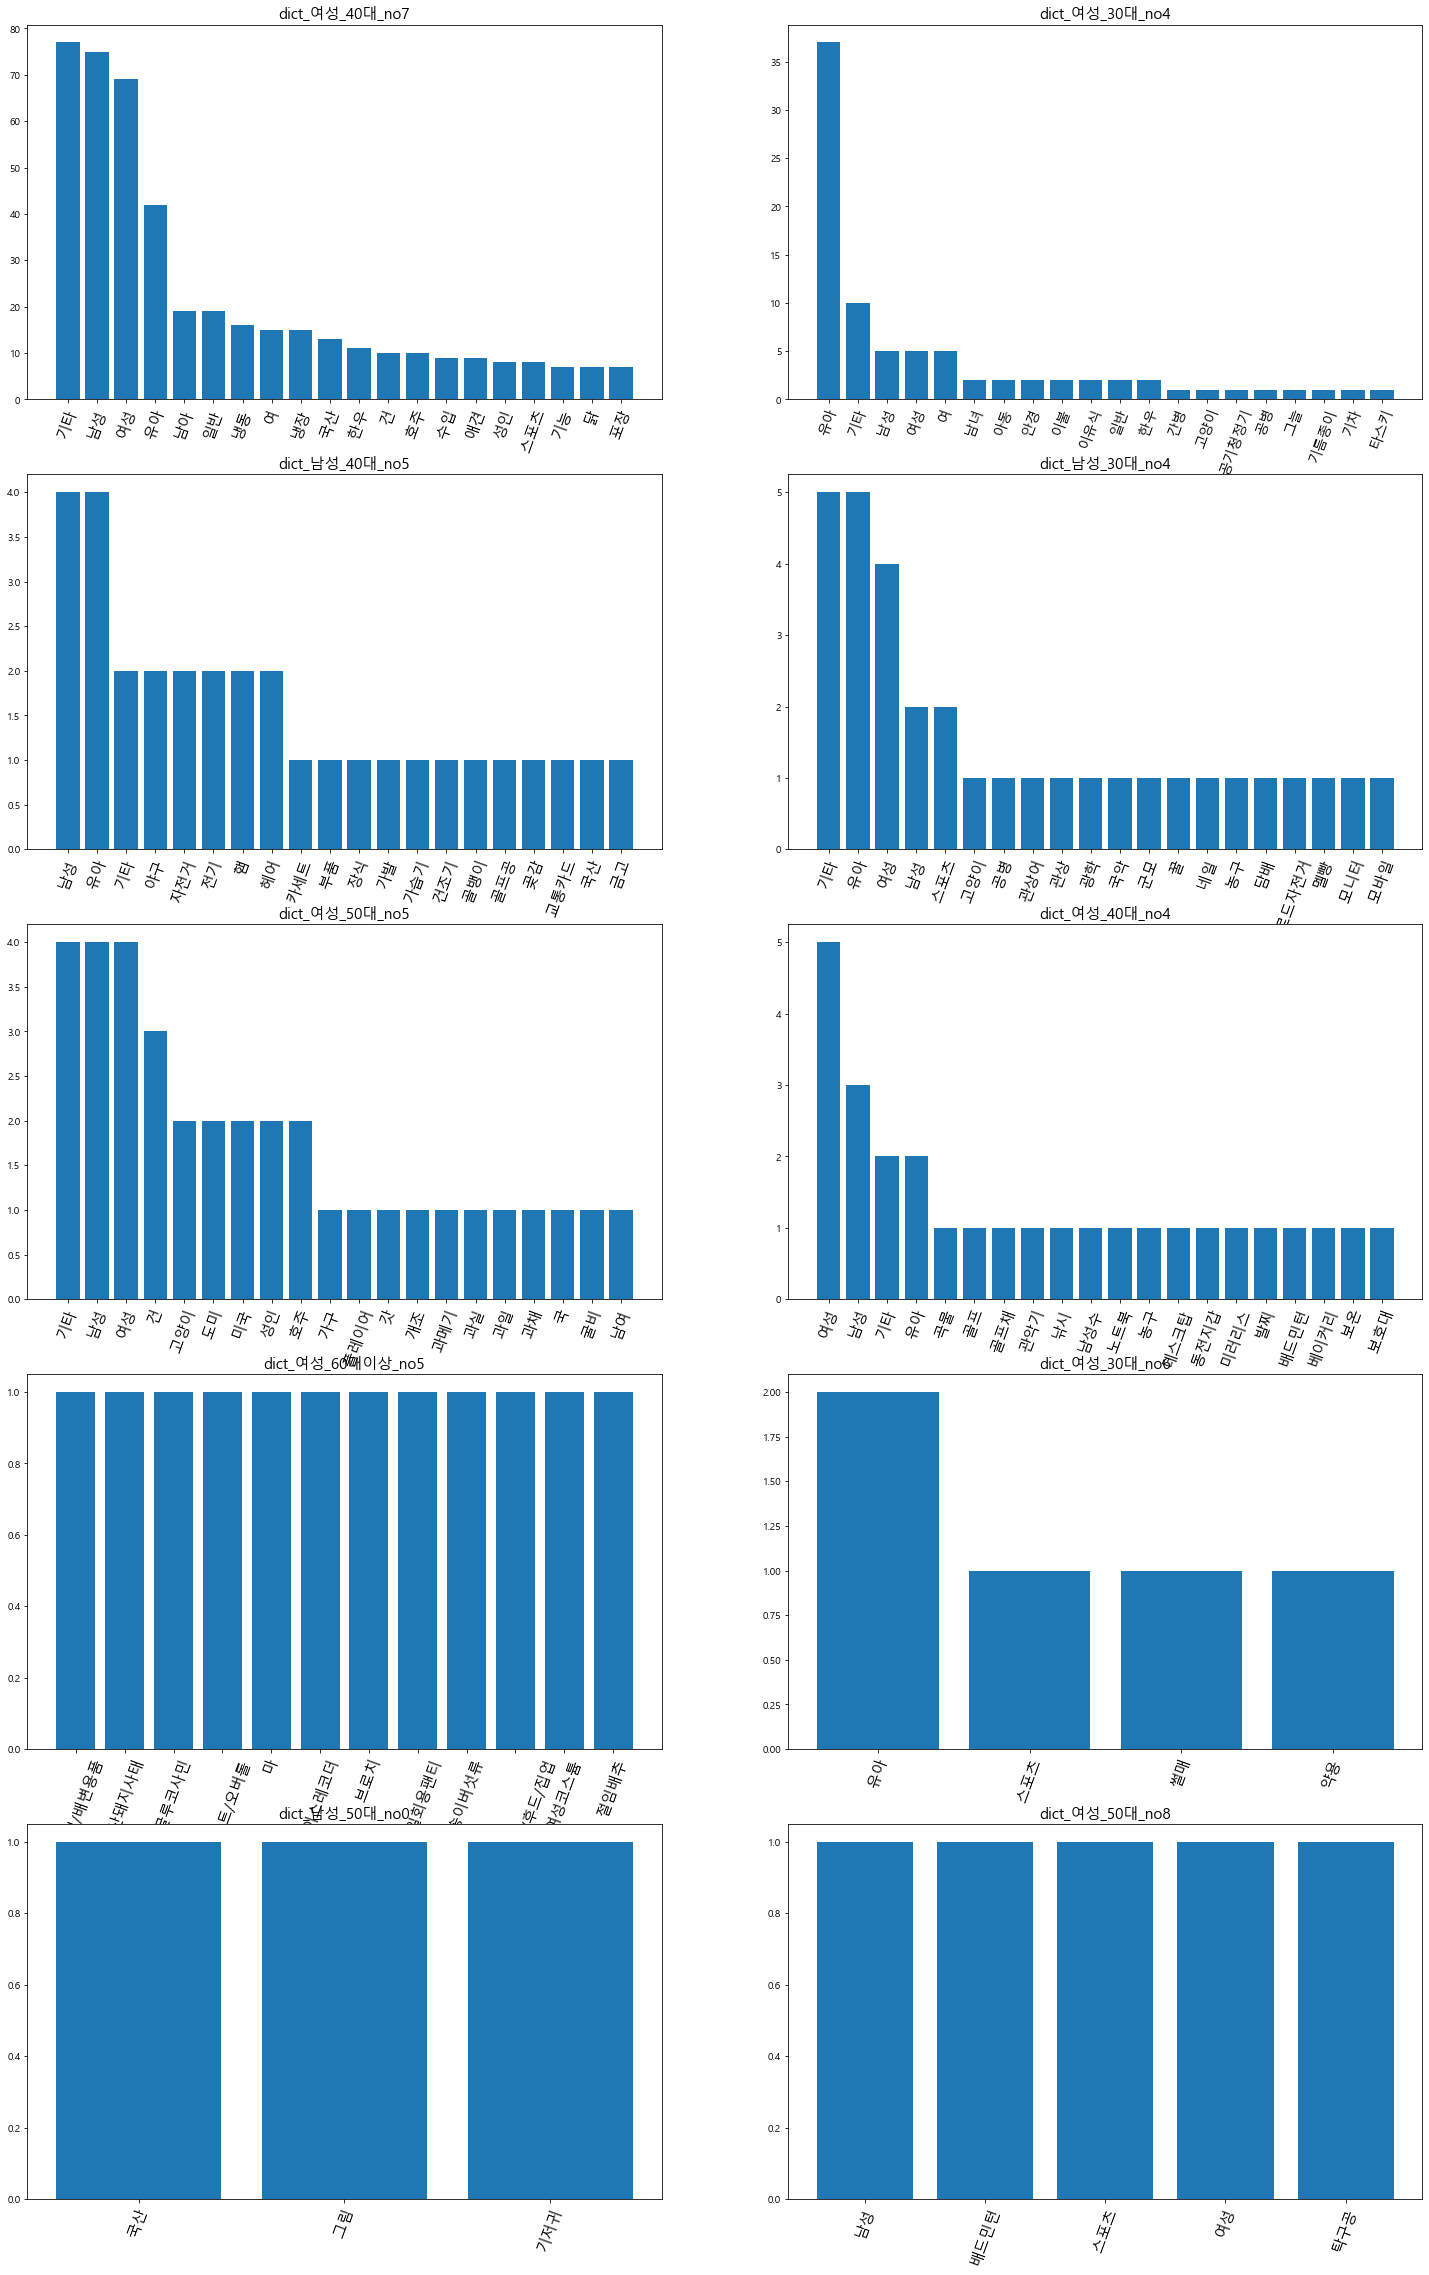

In [36]:
# dict_여성_40대_no7
plt.figure(figsize = (25, 40))

plt.subplot(5,2,1)
plt.bar(여성_40대_no7['item'], 여성_40대_no7['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_40대_no7', size = 15)

plt.subplot(5,2,2)
plt.bar(여성_30대_no4['item'], 여성_30대_no4['count'])
plt.xticks(rotation = 70, size = 14)
plt.title('dict_여성_30대_no4', size = 15)

plt.subplot(5,2,3)
plt.bar(남성_40대_no5['item'], 남성_40대_no5['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_남성_40대_no5', size = 15)

plt.subplot(5,2,4)
plt.bar(남성_30대_no4['item'], 남성_30대_no4['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_남성_30대_no4', size = 15)


plt.subplot(5,2,5)
plt.bar(여성_50대_no5['item'], 여성_50대_no5['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_50대_no5', size = 15)

plt.subplot(5,2,6)
plt.bar(여성_40대_no4['item'], 여성_40대_no4['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_40대_no4', size = 15)

plt.subplot(5,2,7)
plt.bar(여성_60대이상_no5 ['item'], 여성_60대이상_no5 ['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_60대이상_no5', size = 15)

plt.subplot(5,2,8)
plt.bar(여성_30대_no6['item'], 여성_30대_no6['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_30대_no6', size = 15)

plt.subplot(5,2,9)
plt.bar(남성_50대_no0['item'], 남성_50대_no0['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_남성_50대_no0', size = 15)

plt.subplot(5,2,10)
plt.bar(여성_50대_no8['item'], 여성_50대_no8['count'])
plt.xticks(rotation = 70, size = 15)
plt.title('dict_여성_50대_no8', size = 15)
plt.show()

## pdde, cop_u & persona

### 40대_no7_여성

In [37]:
cop_u = pd.merge(cop_u, demo[['cust','persona']], on = 'cust',how = 'inner')
cop_u.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,persona
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,20211026,12,60000,60대이상_no5_남성
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,20211106,10,17100,60대이상_no5_남성
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,20210211,12,136500,60대이상_no5_남성
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,20210920,10,34200,60대이상_no5_남성
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,20211010,9,2500,60대이상_no5_남성


In [38]:
pdde['persona_성별'] = pdde.persona.apply(lambda x : x.split('_')[2])
pdde['persona_나이'] = pdde.persona.apply(lambda x : x.split('_')[0])
pdde['persona_유형'] = pdde.persona.apply(lambda x : x.split('_')[1])

In [39]:
cop_u['persona_성별'] = cop_u.persona.apply(lambda x : x.split('_')[2])
cop_u['persona_나이'] = cop_u.persona.apply(lambda x : x.split('_')[0])
cop_u['persona_유형'] = cop_u.persona.apply(lambda x : x.split('_')[1])

#### pdde

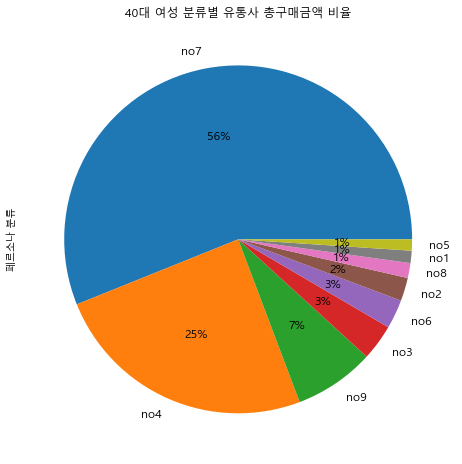

In [40]:
pdde.query('persona_성별 == "여성" & persona_나이 == "40대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('40대 여성 분류별 유통사 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [41]:
print('40대 여성 유통사 평균구매액 :',int(pdde.query('persona_성별 == "여성" & persona_나이 == "40대"').buy_am.mean()),'원')
print('40대_no7_여성 페르소나 유통사 평균구매액 :', int(pdde.query('persona == "40대_no7_여성"').buy_am.mean()), '원')

40대 여성 유통사 평균구매액 : 18980 원
40대_no7_여성 페르소나 유통사 평균구매액 : 13812 원


#### cop_u

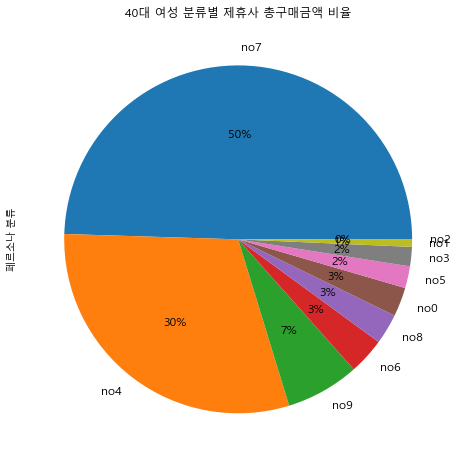

In [42]:
cop_u.query('persona_성별 == "여성" & persona_나이 == "40대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('40대 여성 분류별 제휴사 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [43]:
print('40대 여성 제휴사 평균구매액 :',int(cop_u.query('persona_성별 == "여성" & persona_나이 == "40대"').buy_am.mean()),'원')
print('40대_no7_여성 페르소나 제휴사 평균구매액 :', int(cop_u.query('persona == "40대_no7_여성"').buy_am.mean()), '원')

40대 여성 제휴사 평균구매액 : 16640 원
40대_no7_여성 페르소나 제휴사 평균구매액 : 16455 원


In [44]:
demo.query('persona == "40대_no7_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            2.805189
소비적극성            2.571678
소비충동성            4.011210
가격민감성            4.200650
광고와홍보            3.621620
평일_오전소비력    179580.954419
평일_오후소비력    867748.111949
평일_저녁소비력    388936.439021
주말_오전소비력     64443.335694
주말_오후소비력    409265.116261
주말_저녁소비력    153763.652602
dtype: float64

### 30대_no4_여성

#### pdde

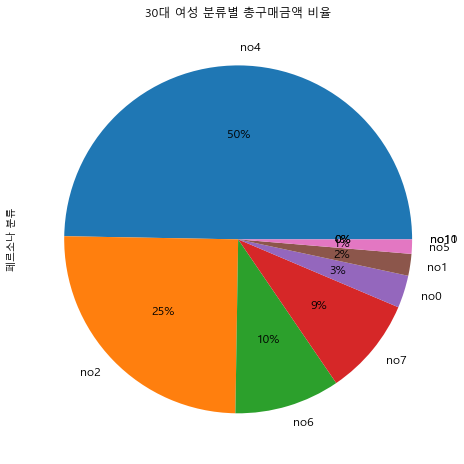

In [45]:
pdde.query('persona_성별 == "여성" & persona_나이 == "30대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('30대 여성 분류별 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [46]:
print('30대 여성 평균구매액 :',int(pdde.query('persona_성별 == "여성" & persona_나이 == "30대"').buy_am.mean()),'원')
print('30대_no4_여성 페르소나 평균구매액 :', int(pdde.query('persona == "30대_no4_여성"').buy_am.mean()), '원')

30대 여성 평균구매액 : 22212 원
30대_no4_여성 페르소나 평균구매액 : 19690 원


#### cop_u

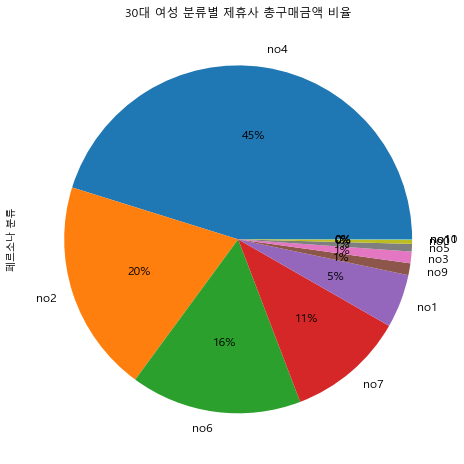

In [47]:
cop_u.query('persona_성별 == "여성" & persona_나이 == "30대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('30대 여성 분류별 제휴사 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [48]:
print('30대 여성 제휴사 평균구매액 :',int(cop_u.query('persona_성별 == "여성" & persona_나이 == "30대"').buy_am.mean()),'원')
print('30대_no4_여성 페르소나 제휴사 평균구매액 :', int(cop_u.query('persona == "30대_no4_여성"').buy_am.mean()), '원')

30대 여성 제휴사 평균구매액 : 18454 원
30대_no4_여성 페르소나 제휴사 평균구매액 : 17040 원


In [49]:
demo.query('persona == "30대_no4_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            2.287027
소비적극성            2.649398
소비충동성            3.908045
가격민감성            3.754769
광고와홍보            3.573255
평일_오전소비력    182226.735231
평일_오후소비력    888044.749731
평일_저녁소비력    404489.003222
주말_오전소비력     61315.720730
주말_오후소비력    400609.184211
주말_저녁소비력    138877.983083
dtype: float64

### 40대_no5_남성

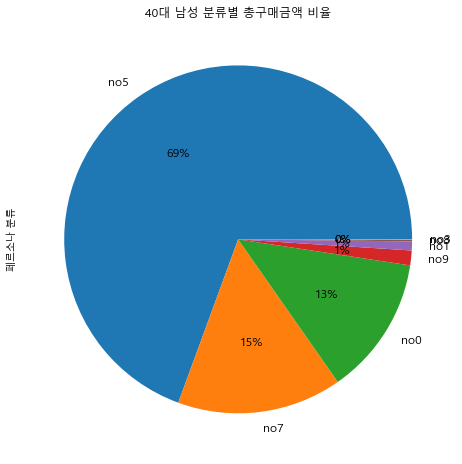

In [50]:
pdde.query('persona_성별 == "남성" & persona_나이 == "40대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('40대 남성 분류별 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [51]:
print('40대 남성 평균구매액 :',int(pdde.query('persona_성별 == "남성" & persona_나이 == "40대"').buy_am.mean()),'원')
print('40대_no5_남성 페르소나 평균구매액 :', int(pdde.query('persona == "40대_no5_남성"').buy_am.mean()), '원')

40대 남성 평균구매액 : 18643 원
40대_no5_남성 페르소나 평균구매액 : 16109 원


#### cop_u

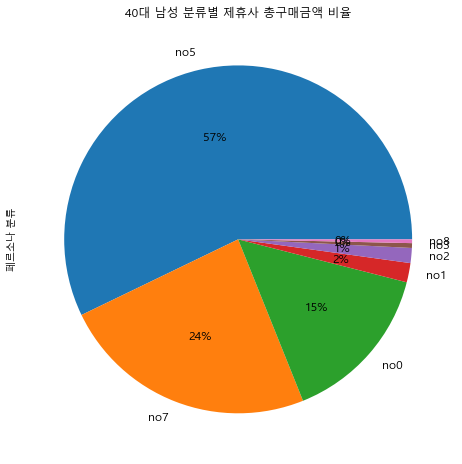

In [52]:
cop_u.query('persona_성별 == "남성" & persona_나이 == "40대"').groupby('persona_유형')['buy_am'].sum().sort_values(ascending = False).plot.pie(autopct = '%1.f%%', figsize = (12,8), fontsize = 12)
plt.title('40대 남성 분류별 제휴사 총구매금액 비율')
plt.ylabel('페르소나 분류')
plt.show()

In [53]:
print('40대 남성 제휴사 평균구매액 :',int(cop_u.query('persona_성별 == "남성" & persona_나이 == "40대"').buy_am.mean()),'원')
print('40대_no5_남성 페르소나 제휴사 평균구매액 :', int(cop_u.query('persona == "40대_no5_남성"').buy_am.mean()), '원')

40대 남성 제휴사 평균구매액 : 21892 원
40대_no5_남성 페르소나 제휴사 평균구매액 : 21156 원


In [54]:
demo.query('persona == "40대_no5_남성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            2.888014
소비적극성            2.349893
소비충동성            3.903463
가격민감성            3.507839
광고와홍보            3.437828
평일_오전소비력    146257.089716
평일_오후소비력    766152.740427
평일_저녁소비력    352694.176149
주말_오전소비력     64649.368982
주말_오후소비력    395002.561816
주말_저녁소비력    138100.195569
dtype: float64

___

## 페르소나별 세그먼트별 EDA

In [101]:
per_pd.query('persona == "20대_no6_여성"').T['20대_no6_여성'].sort_values(ascending = False).index[:20]

Index(['임대매출', '여성티셔츠/탑', '기타남성의류세트', '디저트', '남성티셔츠', '일반스낵', '기타파티/팬시용품',
       '푸드코트한식', '종량제봉투', '남성런닝/트레이닝화', '베이커리일반빵', '생수', '기타여성의류세트', '기타패션잡화',
       '치즈', '빵/케이크', '샐러드류', '일반우유', '수입맥주', '여성재킷'],
      dtype='object', name='pd_nm')

In [82]:
a.persona.value_counts()

40대_no7_여성      1389
30대_no4_여성       173
50대_no5_여성       114
40대_no5_남성        95
30대_no4_남성        88
40대_no4_여성        48
60대이상_no5_여성      12
50대_no8_여성         5
30대_no6_여성         5
50대_no0_남성         3
Name: persona, dtype: int64

In [77]:
lst_여성_20대_no8 = []

In [78]:
여성_20대_no8 = a.query('persona == "20대_no8_여성"').pd_nm.values.tolist()

In [80]:
a.query('persona == "20대_no8_여성"').pd_nm.values

array([], dtype=object)

In [64]:
for i in 여성_20대_no6:
    tokens_text = okt.nouns(i)
    if len(tokens_text) == 0:
        pass
    else:
        lst_여성_20대_no6.append(tokens_text[0])

In [65]:
dict_여성_20대_no6 = get_counts(lst_여성_20대_no6)

In [66]:
dict_여성_20대_no6 = sorted(dict_여성_20대_no6.items(), key = lambda item: item[1], reverse = True)[:20]

In [67]:
# 여성_20대_no6
여성_20대_no6_key_lst = []
여성_20대_no6_value_lst = []
for i in range(len(dict_여성_20대_no6)):
    여성_20대_no6_key = dict_여성_20대_no6[i][0]
    여성_20대_no6_value = dict_여성_20대_no6[i][1]
    여성_20대_no6_key_lst.append(여성_20대_no6_key)
    여성_20대_no6_value_lst.append(여성_20대_no6_value)
여성_20대_no6 = pd.DataFrame({'item' : 여성_20대_no6_key_lst, 'count' : 여성_20대_no6_value_lst})

In [69]:
남성_50대_no0

,item,count
0,국산,1
1,그림,1
2,기저귀,1


## 페르소나별 세그먼트 Summary

In [ ]:
50대_no5_여성
40대_no4_여성
60대이상_no5_여성
30대_no6_여성
50대_no8_여성

#### 50대_no5_여성

In [157]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "50대_no5_여성"').pd_nm.values

array(['DIY가구', '갓', '개조개', '거들', '건나물류', '건망고', '고양이건강용품', '고양이목욕/위생용품',
       '과메기', '과실주병', '과일즙', '과채음료세트', '국그릇', '굴비류', '기타식용유', '기타양주',
       '기타여성특수목적의류', '기타탁구용품', '남성발가락양말', '남성부츠', '남성속옷세트', '남성양말선물세트',
       '남여속옷세트', '냄비', '네일스티커/스톤류', '단호박', '담금소주', '대합', '더덕선물세트', '도다리회',
       '도미', '도미회', '락스', '러그', '매생이', '매실', '명태전감', '무세제크리너',
       '물리치료/의료기용품', '미국산소갈비', '미국산소기타육', '민어', '바운서/쏘서/보행기', '반건생선류',
       '반찬통/밀폐용기', '밤', '벽지', '보리', '분말세탁세제', '생선선물세트', '생선알', '서랍장/수납장',
       '선식', '성인베개/베개커버', '성인침대커버/스커트', '세탁/건조보조용품', '수건', '수입돼지삼겹살',
       '스키/보드고글', '스텝퍼/트위스트', '스툴/리빙의자', '시공가구', '실내DIY용품', '아귀',
       '아이스크림케이크', '액상표백제', '양념통', '어포채류', '얼갈이', '여름자리', '여성내의',
       '여성등산베스트', '여성양말선물세트', '여성한복', '열무', '오메가3/기타추출오일', '욕실발판',
       '용기/리필커피', '우렁이', '우엉', '인삼류', '임연수', '잣', '장식장/진열장', '전어',
       '전자계산기', '조/수수', '조기류', '족욕기', '주전자', '즉석무침반찬', '채소즙', '채칼/강판/절구',
       '책상', '청소기/광택기', '커피용품', '커피크리머', '콩', '톳', '포장크랩류', '해파리',
       '햇빛차단용품', '헤어무스/젤

In [159]:
demo.query('persona == "50대_no5_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            2.279270
소비적극성            2.506434
소비충동성            4.033898
가격민감성            4.387224
광고와홍보            3.685159
평일_오전소비력    146141.649734
평일_오후소비력    931966.647742
평일_저녁소비력    405264.211487
주말_오전소비력     55971.360890
주말_오후소비력    374138.549469
주말_저녁소비력    149313.340637
dtype: float64

#### 40대_no4_여성

In [160]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "40대_no4_여성"').pd_nm.values

array(['MP3', '곡물선물세트', '골프연습장비', '골프채세트', '관악기', '기타DVD/홈시어터액세서리',
       '기타남성특수목적의류', '기타여성양말류', '남성골프니트/가디건', '남성골프패딩', '노트북가방', '농구복',
       '데스크탑/올인원PC', '미러리스', '발찌', '배드민턴복', '베이커리원부재료', '보온도시락',
       '보호대/보행보조용품', '수입산소토시살', '스키복', '아이스크림믹스', '악기부품/액세서리', '애견건강용품',
       '여성가방액세서리', '여성골프패딩', '여성등산/아웃도어세트', '여성스포츠속옷', '요가/스포츠매트',
       '유아동스포츠패딩', '일반형냉장고', '자전거의류', '전기프라이팬', '카페트', '캐노피'],
      dtype=object)

In [161]:
demo.query('persona == "40대_no4_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워       3.494569e+00
소비적극성       2.523230e+00
소비충동성       3.731115e+00
가격민감성       2.353499e+00
광고와홍보       3.259276e+00
평일_오전소비력    2.443341e+05
평일_오후소비력    1.118325e+06
평일_저녁소비력    3.452747e+05
주말_오전소비력    9.077275e+04
주말_오후소비력    4.967081e+05
주말_저녁소비력    1.394819e+05
dtype: float64

#### 60대이상_no5_여성

In [162]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "60대이상_no5_여성"').pd_nm.values

array(['고양이모래/배변용품', '국산돼지사태', '글루코사민', '남성점프수트/오버롤', '마', '보이스레코더',
       '브로치', '성인용일회용팬티', '여성골프스웨트셔츠/후드/집업', '여성코스튬', '절임배추'],
      dtype=object)

In [163]:
demo.query('persona == "60대이상_no5_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            1.686233
소비적극성            1.350481
소비충동성            3.848053
가격민감성            3.335852
광고와홍보            3.288938
평일_오전소비력     97037.112832
평일_오후소비력    634479.936394
평일_저녁소비력    124405.674779
주말_오전소비력     30222.811394
주말_오후소비력    228105.698009
주말_저녁소비력     41812.661504
dtype: float64

#### 30대_no6_여성

In [164]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "30대_no6_여성"').pd_nm.values

array(['스포츠시계', '썰매류', '약용버섯류', '유아동패드/스프레드'], dtype=object)

In [165]:
demo.query('persona == "30대_no6_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            3.241203
소비적극성            2.126271
소비충동성            3.726972
가격민감성            2.020418
광고와홍보            3.012486
평일_오전소비력     63071.672881
평일_오후소비력    379151.809605
평일_저녁소비력    148792.697740
주말_오전소비력     29614.171186
주말_오후소비력    194456.883051
주말_저녁소비력     77912.137853
dtype: float64

#### 50대_no8_여성

In [166]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "50대_no8_여성"').pd_nm.values

array(['기타남성양말류', '배드민턴화', '스포츠선글라스', '여성스포츠전신/원피스', '탁구공'], dtype=object)

In [167]:
demo.query('persona == "50대_no8_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            3.402493
소비적극성            1.719592
소비충동성            3.820829
가격민감성            2.305749
광고와홍보            3.113102
평일_오전소비력     77470.955214
평일_오후소비력    622329.588235
평일_저녁소비력    162425.625000
주말_오전소비력     33396.475936
주말_오후소비력    327181.074866
주말_저녁소비력     67515.643717
dtype: float64

#### 40대_no0_남성

In [144]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "40대_no0_남성"').pd_nm.values

array(['DVD플레이어', '레저모바일상품권', '숙박', '시가/기타특수담배', '유지보수품', '장롱', '전자담배용리필',
       '파충류'], dtype=object)

In [146]:
per_pd.query('persona == "40대_no0_남성"').T['40대_no0_남성'].sort_values(ascending = False).index[:50]

Index(['일반스낵', '종량제봉투', '국산맥주', '국산담배', '수입담배', '커피음료', '일반우유', '가공우유',
       '국물용기라면', '수입맥주', '국물봉지라면', '일반소주', '생수', '옥수수스낵', '감자스낵', '콜라',
       '냉장커피차음료', '기타생활서비스', '일반빵', '쿠키', '젤리', '스포츠음료', '일반계란', '봉투보증금',
       '혼합탄산', '두부류', '바나나', '과일음료', '마시는요구르트', '소시지', '일반요구르트', '파우치/즉석음료',
       '떠먹는요구르트', '일반차음료', '어묵', '냉장과일야채음료', '삼각김밥', '사이다', '임대매출', '도시락',
       '치즈', '크래커', '기타파티/팬시용품', '김밥', '생활잡화균일가', '샌드위치', '비빔봉지라면', '기능성우유',
       '막걸리', '비타민/에너지음료'],
      dtype='object', name='pd_nm')

In [125]:
demo.query('persona == "40대_no0_남성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            1.613032
소비적극성            2.172433
소비충동성            3.934030
가격민감성            2.819488
광고와홍보            3.166442
평일_오전소비력     80620.851752
평일_오후소비력    300869.607817
평일_저녁소비력    184632.361860
주말_오전소비력     32226.436658
주말_오후소비력    203098.814016
주말_저녁소비력     70712.452156
dtype: float64

#### 50대_no4_여성

In [152]:
per_pd.idxmax().reset_index().rename(columns = {0 : 'persona'}).query('persona == "50대_no4_여성"').pd_nm.values

array(['에어워셔'], dtype=object)

In [153]:
per_pd.query('persona == "50대_no4_여성"').T['50대_no4_여성'].sort_values(ascending = False).index[:50]

Index(['기타파티/팬시용품', '종량제봉투', '국물봉지라면', '여성티셔츠/탑', '일반스낵', '일반우유', '임대매출',
       '기타남성의류세트', '일반빵', '두부류', '베이커리', '일반계란', '생활잡화균일가', '국산맥주', '쿠키',
       '푸드코트한식', '바나나', '남성티셔츠', '여성재킷', '디저트', '떠먹는요구르트', '베이커리일반빵',
       '마시는요구르트', '일반소주', '기타여성의류아우터', '어묵', '비빔봉지라면', '국물용기라면', '국산담배',
       '샐러드류', '기타여성의류세트', '한식', '생수', '치즈', '남성런닝/트레이닝화', '소시지', '옥수수스낵',
       '고추', '일식', '크래커', '감자스낵', '냄비', '기타아웃도어/레저용품', '냉동만두', '양념소스', '콩나물',
       '커피/음료', '커피음료', '물티슈', '스킨/토너'],
      dtype='object', name='pd_nm')

In [149]:
demo.query('persona == "50대_no4_여성"')[['브랜드파워','소비적극성','소비충동성','가격민감성','광고와홍보','평일_오전소비력',
       '평일_오후소비력', '평일_저녁소비력', '주말_오전소비력', '주말_오후소비력', '주말_저녁소비력']].mean()

브랜드파워            1.605801
소비적극성            1.065035
소비충동성            3.683983
가격민감성            2.363468
광고와홍보            3.084958
평일_오전소비력     62463.236072
평일_오후소비력    532492.121170
평일_저녁소비력    187548.007660
주말_오전소비력     20890.094011
주말_오후소비력    218565.281337
주말_저녁소비력    114730.794568
dtype: float64